In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns

In [2]:
vol_file = Path('analysis_sections_based_on_swim_pattern.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

## Single neuron analysis

Processing 03152018 Fish1-1
[[0.00558472 0.41425429]
 [0.99986001 0.95284236]]
[[0.98501075 0.15534223]
 [0.04248288 0.65654217]]


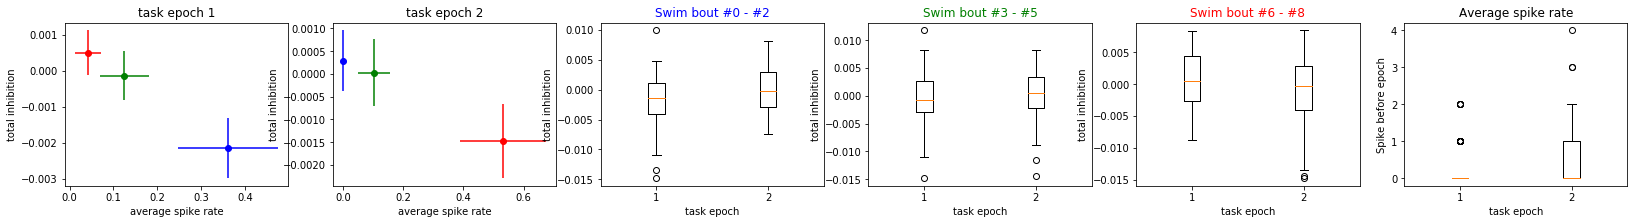

In [3]:
from activity_swim_bout import *
from utils import cont_mode
mean_spk_sub(dat_xls_file.iloc[0], isplot=True);
# error bar in the first two plots are sem

In [4]:
sns.set(font_scale=2, style='ticks')

In [5]:
row = dat_xls_file.iloc[0]
folder = row['folder']
fish = row['fish']
print(f'Processing {folder} {fish}')
dat_dir = dir_folder/f'{folder}/{fish}/Data/'
swim_dir = dir_folder/f'{folder}/{fish}/swim/'
dff = np.load(dat_dir/'Voltr_spikes.npz')['voltrs']
dff = dff - np.nanmedian(dff, axis=1, keepdims=True)
spk = np.load(dat_dir/'Voltr_spikes.npz')['spk']
num_cell = spk.shape[0]
spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')

Processing 03152018 Fish1-1


In [33]:
from sklearn.decomposition import PCA, TruncatedSVD

subvolt = dff.copy()
for n, ndff in enumerate(dff):
    subvolt[n, :] = medfilt(ndff, kernel_size=1001)

# pca = PCA()
# pca.fit(subvolt.T)
# sub_pc = pca.transform(subvolt.T)

svd = TruncatedSVD(n_components=10)
svd.fit(subvolt.T)
sub_pc = svd.transform(subvolt.T)

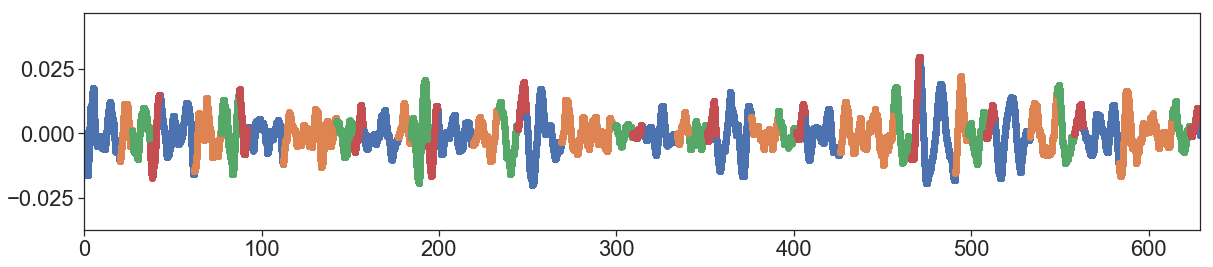

In [34]:
plt.figure(figsize=(20, 4))
params_len = frame_stimParams.shape[1]
n_comp = 0
for n_stim in range(frame_stimParams[2].max().astype('int')):
    plt.scatter(np.arange(params_len)[frame_stimParams[2]==n_stim+1]/300, sub_pc[:params_len,n_comp][frame_stimParams[2]==n_stim+1])
plt.xlim([0, params_len/300])
plt.show()

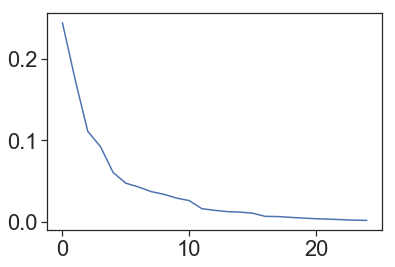

In [31]:
plt.plot(pca.explained_variance_ratio_)

## See if the high gain and low gain can be decoded using LDA coder